# **Python AI / ML Assignment**

In [6]:
import pandas as pd

df = pd.read_csv('/content/Mental Health Dataset.csv')

print(f"{df.shape[0]} {df.shape[1]}")
print(df.head())

236035 17
         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236035 entries, 0 to 236034
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                236035 non-null  object
 1   Gender                   236035 non-null  object
 2   Country                  236035 non-null  object
 3   Occupation               236035 non-null  object
 4   self_employed            231742 non-null  object
 5   family_history           236034 non-null  object
 6   treatment                236034 non-null  object
 7   Days_Indoors             236034 non-null  object
 8   Growing_Stress           236034 non-null  object
 9   Changes_Habits           236034 non-null  object
 10  Mental_Health_History    236034 non-null  object
 11  Mood_Swings              236034 non-null  object
 12  Coping_Struggles         236034 non-null  object
 13  Work_Interest            236034 non-null  object
 14  Social_Weakness     

In [50]:
print(df.shape)
df_processed = df.drop(columns=['Timestamp'])
df_processed.shape

(236035, 17)


(236035, 16)

In [11]:
missing_values = df_processed.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print(columns_with_missing_values)


['self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']


In [12]:
for col in columns_with_missing_values:
    if df_processed[col].dtype == 'object':
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"{col} {mode_value}")

/tmp/ipython-input-4139172208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(mode_value, inplace=True)


self_employed No
family_history No
treatment Yes
Days_Indoors 1-14 days
Growing_Stress Maybe
Changes_Habits Yes
Mental_Health_History No
Mood_Swings Medium
Coping_Struggles No
Work_Interest No
Social_Weakness No
mental_health_interview No
care_options No


In [13]:
print(df_processed.isnull().sum())

Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [47]:
df.shape

(236035, 17)

In [37]:
X = df_processed.drop('treatment', axis=1)
y = df_processed['treatment']
print(X.shape)
print(y.shape)

(236035, 15)
(236035,)


In [33]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X, drop_first=True)
X.shape
y = y.fillna(y.mode()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(188828, 63)
(47207, 63)
(188828,)
(47207,)


In [38]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

,proportion
treatment,
Yes,0.514712
No,0.485288


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:5])
print(y_pred.shape)

['No' 'No' 'Yes' 'Yes' 'No']
(47207,)


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, pos_label='Yes')

recall = recall_score(y_test, y_pred, pos_label='Yes')

f1 = f1_score(y_test, y_pred, pos_label='Yes')

In [42]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.7174147901794226
0.7198988601701718
0.7382089060828052
0.7289389198195635


In [45]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

          No       0.71      0.70      0.70     22909
         Yes       0.72      0.74      0.73     24298

    accuracy                           0.72     47207
   macro avg       0.72      0.72      0.72     47207
weighted avg       0.72      0.72      0.72     47207

[[15930  6979]
 [ 6361 17937]]


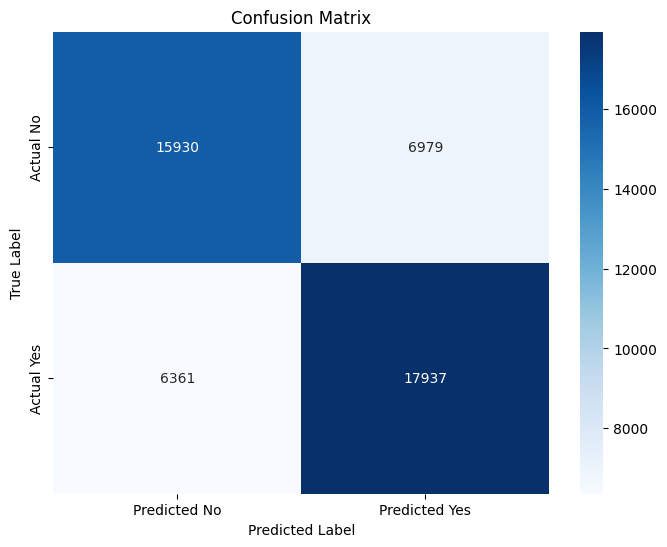

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1) What metric(s) did you use?
- I used Accuracy, Precision, Recall, and F1-score to check how well the model is working.

     - Accuracy tells how many predictions the model got right overall.

    - Precision shows how many of the positive predictions were actually correct.

    - Recall tells how many real positive cases the model was able to find.

    - F1-score gives a balanced result by combining precision and recall.

2) Why did you choose these metrics?

- I chose these metrics because accuracy alone does not give the full picture. Accuracy tells how many answers are correct, but it can be misleading if the data is not balanced. Precision helps to check how many predicted positive results are actually correct. Recall shows whether the model is missing important cases. F1-score combines both precision and recall, so it gives a better overall idea of the model’s performance. These metrics together help in understanding the model in a simple and clear way.


3) What do the results indicate?

- The results show that the model is able to understand the pattern in the data and make fairly good predictions. A good accuracy means most of the predictions are correct. The precision and recall values show that the model is not making too many wrong predictions and is also able to identify most of the important cases. Overall, the results indicate that the model is working properly, but there is still scope to improve it with better data or tuning.


4) write in simple words as a simple human being talk in india?
- One main limitation is that the dataset is based on survey data, so the answers may not always be fully accurate or honest. The model also uses limited features, so it may miss some important factors that affect mental health. Another limitation is that the model is simple and not highly tuned, so its performance can be improved. Also, the results depend on the quality of data, and any imbalance in the data can affect the predictions.

5) How would you improve this system if given more time or data?
- If I get more time or data, I would first try to collect more quality data with better and more relevant features. I would also do better feature selection and try different machine learning models to compare performance. Tuning the model parameters can help improve accuracy. I would also handle data imbalance more carefully and do deeper analysis to understand patterns better. With more data and time, the model results can become more reliable and useful.
